In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

# SLU9 - Regression: Learning notebook

In this notebook we will cover the following:
- Simple Linear Regression
- Gradient Descent
- The impact of learning rate
- Muliple Linear Regression
- Using scikit learn linear regression
- (Extra) Computational graphs: a conceptual framework for automated differentiation
- (Extra) What is that *random_state* thing?


A modeling task which objective is to create a map between the *independent variables* (i.e. the columns in your pandas dataframe) and the *dependent variables* (i.e. the variable you want to predict) by estimating a set of *unknown parameters*. TODO

## Simple Linear regression

$$\hat{y} = \beta_0 + \beta_1 \cdot x$$

In order to estimate the parameters of the regression with the data we have, we have, at least, 4 ways of doing it:
1. iterative methods using gradients;
2. closed form solution through normal equations;
3. evolutionary methods like genetic algorithms or particle swarm.

Methods based on 3 are kind of an overkill, they don't guarantee you the optimal set of parameters for the model and just a curiosity. Methods 1 and 2 are the ones that we actually use to optimize the parameters. Let's look into them.

## Gradient Descent

A lot of modern machine learning is based on setting up a really nice function and adjusting its internal parameters according to the data you have. In order to adapt the parameters of a function, you need somekind of optimization procedure. If your function is differentiable (TODO) and convex (TODO), you can find the best set of parameters using something called **gradient descent**. This refers to a whole family of optimization methods based on partial derivatives of functions. But, before going into what gradient descent actually is, we need to talk about **derivatives**!

### Derivatives

Derivatives is one of the main topics (if not the main topic) of a subfield of calculus called *differential calculus*. They allow you to know how a change in the input might change the output. TODO


### Stochastic Gradient Descent

$$\omega_{i+1} = \omega_{i} - \alpha \frac{\partial f}{\partial \omega_{i}}$$



In [6]:
import numpy as np

In [257]:
def sech(x): 
    return 1 / np.cosh(x)

In [289]:
def get_computed_function(x, name='convex-1'):
    if name == 'convex-1': 
        # grad: 2*x
        return x**2
    if name == 'convex-2':
        # grad: 2*x + 3
        return x**2 + 3*x +2
    if name == 'non-convex-1':
        return np.sin(10 * x) * (2 - 1.4 * np.tanh(x ** 2))
    if name == 'non-convex-2': 
        # grad: 2*x + np.cos(x)*(15*x/abs(x)) - abs(15*x)*np.sin(x)
        return (x**2) + abs(15*x) * np.cos(x)
    if name == 'non-convex-3': 
        # grad: -3 * np.sin(x) + x / abs(x)
        return 3 * np.cos(x) + abs(x)

In [298]:
def plot_function(curr_x, name='convex-1', range_def=[-10.0, 10.0, 10000]):
    x = np.linspace(*range_def)
    y = get_computed_function(x, name=name)
    
    curr_y = get

    #dy = 10 * np.cos(10 * x) * (2 - 1.4 * np.tanh(x**2)) - 2.8 * x * np.sin(10 * x) * (sech(x ** 2)**2)

    plt.plot(x, y)
    plt.plot([-5], [4], 'o')
    #plt.plot(x, dy)

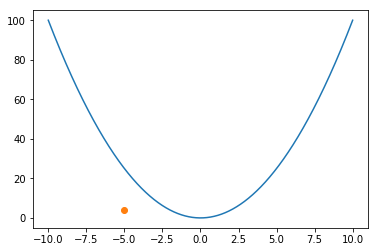

In [299]:
plot_function(4)

### Batch Gradient Descent

$$\omega_{i+1} = \omega_{i} - \alpha \frac{\partial f}{\partial \omega_{i}}$$

TODO

In [22]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider, Dropdown
import ipywidgets as widgets

In [23]:
def f(x):
    return x

In [242]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [243]:
interact_manual(f, x=FloatSlider(min=1e5, max=1e7, step=1e5));

interactive(children=(FloatSlider(value=100000.0, description='x', max=10000000.0, min=100000.0, step=100000.0…

## Multiple Linear Regression

$$\hat{y} = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \beta_3 \cdot x_3 + \beta_4 \cdot x_4 + \beta_5 \cdot x_5$$

$$\hat{y} = \beta_0 + \sum_{i=1}^{5} \beta_i \cdot x_i$$

$$\hat{y}^{[j]} = \beta_0 + \sum_{i=1}^{5} \beta_i \cdot x_i^{[j]}$$

In [171]:
from sklearn.datasets import make_regression

In [172]:
x, y = make_regression(n_features=1, n_samples=500, noise=30.5, random_state=10)

In [173]:
import pandas as pd

In [174]:
d = pd.concat((pd.DataFrame(x), pd.DataFrame(y)), axis=1)
d.columns = ['x', 'y']

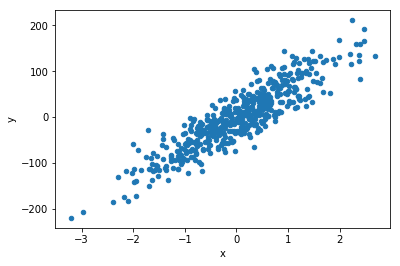

In [175]:
d.plot.scatter('x', 'y')

In [176]:
from sklearn.linear_model import SGDRegressor

In [177]:
lr = SGDRegressor(penalty=None, random_state=10)

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lr = LinearRegression()

In [180]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [181]:
lr.score(x, y)

0.8056952217905837

In [182]:
lr.coef_

array([63.83578064])

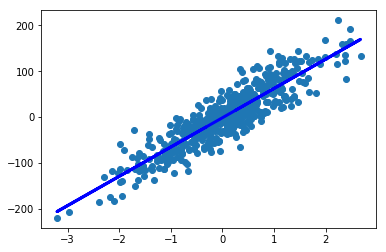

In [183]:
plt.scatter(x, y)
plt.plot(x, lr.fit(x, y).predict(x), color='blue', linewidth=3)

In [185]:
rs = np.random.RandomState(10)
x = rs.rand(5000, 1)
y = rs.rand(5000, 1)

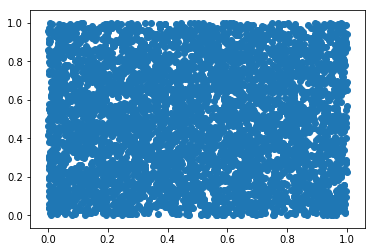

In [186]:
plt.scatter(x, y)

In [187]:
lr = LinearRegression()

In [188]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

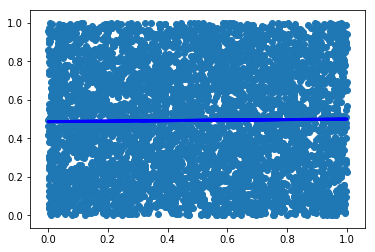

In [189]:
plt.scatter(x, y)
plt.plot(x, lr.fit(x, y).predict(x), color='blue', linewidth=3)

In [190]:
lr.score(x, y)

0.00017788109353056303

In [191]:
lr.coef_

array([[0.01331052]])

In [192]:
lr.intercept_

array([0.48679911])

Hmmm...the coeficient is pretty much close to zero and the intercept is about 0.5. 

Our completely random data set was generated, for both variables, between 0 and 1.

## Using scikit learn linear regression

Scikit Learn is one of the main pieces of tech stacks for data science throughout the world. It offers a wide range of algorithms to create models for regression, classification and unsupervised learning tasks, as well as methods for preprocessing and visualizations. Also, it provides the users with well-thought abstractions to chain all the transformers and models into a single pipeline. TODO

There are two implementations of the basic linear regression: 
* *sklearn.linear_model.LinearRegression*: TODO
* *sklearn.linear_model.SGDRegressor*: TODO

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [5]:
from sklearn.linear_model import SGDRegressor

In [6]:
lr = SGDRegressor()

### (EXTRA) What is that *random_state* thing?

You have probably noticed that SGDRegressor used a misterious parameter: *random_state*. 

The parameter *random_state* is a very common one in scikit-learn and numpy. This parameter is the seed for the random numbers generator.

This is actually **very important** for you to know because, by controlling the *random_state* value, you will make the entire process **reproducible** (i.e. everytime we run your code, we get the same results).

You might be wondering _"why does scikit-learn need to generate random numbers?"_. Machine/Statistical learning and data analysis depend *a lot* on random processes. A random process depends, as the name suggests, on randomness. These random processes are used in many things: sampling probability distributions, initializing the parameters vector of a linear regression or neural network, selecting feature values to be used in cuts on decision trees, selecting subsets of data for cross-validation, etc. So, again, random_state is **really_important**.

Inside every piece of scikit-learn code that uses random numbers generators TODO

If you set the *random_state* parameter to an integer, you get the same result everytime, unless there is a bug in the implementation.

In [60]:
import numpy as np
from sklearn.utils import check_random_state

In [61]:
help(check_random_state)

Help on function check_random_state in module sklearn.utils.validation:

check_random_state(seed)
    Turn seed into a np.random.RandomState instance
    
    Parameters
    ----------
    seed : None | int | instance of RandomState
        If seed is None, return the RandomState singleton used by np.random.
        If seed is an int, return a new RandomState instance seeded with seed.
        If seed is already a RandomState instance, return it.
        Otherwise raise ValueError.



In [62]:
check_random_state(None)

In [63]:
check_random_state(10)

In [80]:
rs1 = np.random.RandomState(10)

In [81]:
rs2 = check_random_state(np.random.RandomState(10))

In [82]:
rs1.rand(5)

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701])

In [83]:
rs2.rand(5)

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701])

In [91]:
np.random.seed(10)

In [92]:
np.random.rand(10)

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981])

## (EXTRA) Computational graphs: a conceptual framework for automated differentiation

Nowadays, many of the mainstream machine learning models are based on gradient descent in one way or another. Even if they aren't (explicitly), they are obtained through the minimization/maximization of a differentiable function (e.g. K-Means, Support Vector Machines, Probabilistic Graphical Models). 

Computational graphs aren't a theory that provides a better optimization method nor a better model. It is "just" the reframing of our mind set on how we represent functions. TODO

MAIN PURPOSES OF CGs:
* Make it easy to visually debug TODO
* Unify several models, based on differentiable 
* TODO: shared parameters
* TODO: max/min pool
* A conceptual framework that allows efficient and parallelizable TODO


Computational graphs are, literally, the backbone of frameworks like PyTorch, Autograd, TensorFlow and Chainer.

In order to grasp the intuition behind Computational Graphs, let's start with some simple examples

$$f(x) = x^2 + y + 2$$

$$f(x) = x^2 + x y$$

$$f(x) = \frac{xy + zxy}{2z + y}$$